# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations  1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#cities

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL (I have used Wk6 Day2 exercise 4 for help with this section) for requests
# I have used this sote for Unix time conversion 
#https://www.geeksforgeeks.org/how-to-convert-datetime-to-unix-timestamp-in-python/
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
#    print({city_url}) 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather = weather_json["weather"][0]["main"]
#       I could also use ["weather"]["description"] for city_weather
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]       
        city_max_temp = weather_json["main"]["temp_max"] 
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"] 
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        
        city_date = weather_json["dt"]
# assigned unix time 
        date_time = datetime.datetime.fromtimestamp(city_date) 

        lcity_date = date_time.strftime('%Y-%m-%d')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": lcity_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
#city_data            
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | sidi ali
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | santa maria
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | stephenville
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | kapoeta
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | quelimane
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | pisco
Processing Record 23 of Set

Processing Record 33 of Set 4 | sao joao da barra
Processing Record 34 of Set 4 | meulaboh
Processing Record 35 of Set 4 | pangnirtung
Processing Record 36 of Set 4 | te anau
Processing Record 37 of Set 4 | husavik
Processing Record 38 of Set 4 | waitati
Processing Record 39 of Set 4 | myronivka
Processing Record 40 of Set 4 | akdepe
Processing Record 41 of Set 4 | salisbury
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | pandan
Processing Record 44 of Set 4 | junagarh
Processing Record 45 of Set 4 | nikolskoye
Processing Record 46 of Set 4 | lerwick
Processing Record 47 of Set 4 | letlhakeng
Processing Record 48 of Set 4 | grand centre
City not found. Skipping...
Processing Record 49 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 0 of Set 5 | san quintin
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | riyadh
Processing Record 3 of Set 5 | mpika
Processing Record 4 of Set 5 | bowen
Processing Record 5 of Set 5 | suru

Processing Record 26 of Set 8 | copala
Processing Record 27 of Set 8 | oktyabrskoye
Processing Record 28 of Set 8 | jipapad
Processing Record 29 of Set 8 | alihe
Processing Record 30 of Set 8 | ust-omchug
Processing Record 31 of Set 8 | sisimiut
Processing Record 32 of Set 8 | jalingo
Processing Record 33 of Set 8 | college
Processing Record 34 of Set 8 | orizona
Processing Record 35 of Set 8 | salcininkai
Processing Record 36 of Set 8 | palmer
Processing Record 37 of Set 8 | santa cruz
Processing Record 38 of Set 8 | caraquet
Processing Record 39 of Set 8 | saint-pierre
Processing Record 40 of Set 8 | villazon
Processing Record 41 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 8 | luang prabang
Processing Record 43 of Set 8 | codrington
Processing Record 44 of Set 8 | fort nelson
Processing Record 45 of Set 8 | lahij
Processing Record 46 of Set 8 | lazaro cardenas
Processing Record 47 of Set 8 | mergui
City not found. Skipping...
Processing Record 48 of

Processing Record 12 of Set 12 | belaya kholunitsa
Processing Record 13 of Set 12 | wukari
Processing Record 14 of Set 12 | timra
Processing Record 15 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 16 of Set 12 | roma
Processing Record 17 of Set 12 | bonfim
Processing Record 18 of Set 12 | pocatello
Processing Record 19 of Set 12 | varhaug
Processing Record 20 of Set 12 | jinji
Processing Record 21 of Set 12 | avera
Processing Record 22 of Set 12 | alushta
Processing Record 23 of Set 12 | flin flon
Processing Record 24 of Set 12 | paranapanema
Processing Record 25 of Set 12 | suntar
Processing Record 26 of Set 12 | arlit
Processing Record 27 of Set 12 | nhulunbuy
Processing Record 28 of Set 12 | alamogordo
Processing Record 29 of Set 12 | tezu
Processing Record 30 of Set 12 | wanning
Processing Record 31 of Set 12 | shubarkuduk
Processing Record 32 of Set 12 | banes
Processing Record 33 of Set 12 | zabaykalsk
Processing Record 34 of Set 12 | sola
Processing Record 3

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
#city_data_df
# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,26.85,81,49,6.79,PF,2023-04-03
1,sidi ali,36.0998,0.4206,12.28,50,0,2.26,DZ,2023-04-03
2,constitucion,-35.3333,-72.4167,13.71,62,23,3.95,CL,2023-04-03
3,narsaq,60.9167,-46.0500,7.12,73,100,2.80,GL,2023-04-03
4,cidreira,-30.1811,-50.2056,20.18,76,7,5.80,BR,2023-04-03


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,26.85,81,49,6.79,PF,2023-04-03
1,sidi ali,36.0998,0.4206,12.28,50,0,2.26,DZ,2023-04-03
2,constitucion,-35.3333,-72.4167,13.71,62,23,3.95,CL,2023-04-03
3,narsaq,60.9167,-46.0500,7.12,73,100,2.80,GL,2023-04-03
4,cidreira,-30.1811,-50.2056,20.18,76,7,5.80,BR,2023-04-03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

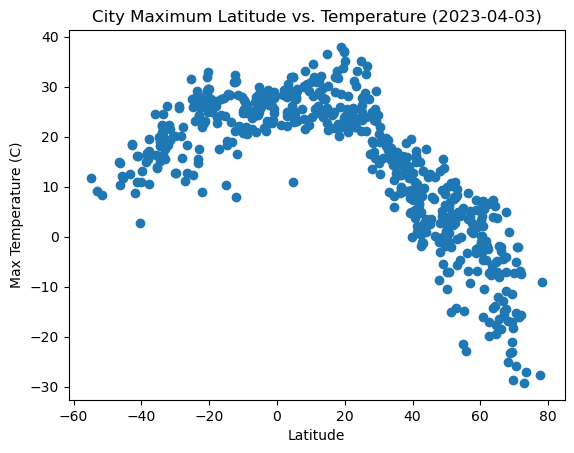

In [8]:
# Build scatter plot for latitude vs. temperature
# anything stated with good has working code for regression graphing
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
#good  (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#good  regress_values = x_values * slope + intercept
#good  line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#good  plt.plot(x_values,regress_values,"r-")
#good  plt.annotate(line_eq,(20,44),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Maximum Latitude vs. Temperature ({lcity_date})")




# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
#good  print(f"The r  correlation between Latitude and the Max Temperature is: {rvalue}")
plt.show()
#good  line_eq

#### Latitude Vs. Humidity

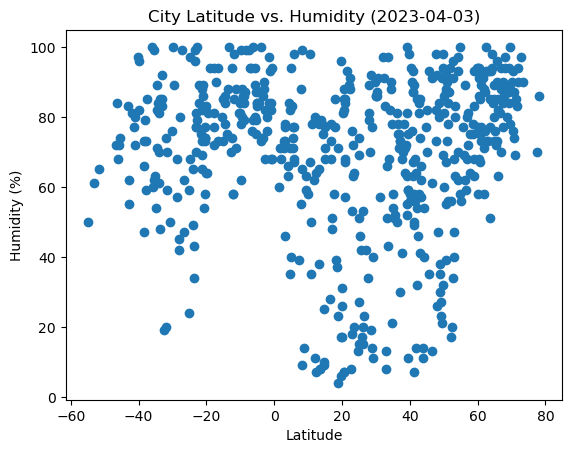

In [9]:
# Build the scatter plots for latitude vs. humidity
#x_values = city_data_df['Lat']
north_x_values = city_data_df.loc[city_data_df['Lat'] > 0, 'Lat'];
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
#plt.annotate(line_eq,(20,44),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({lcity_date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

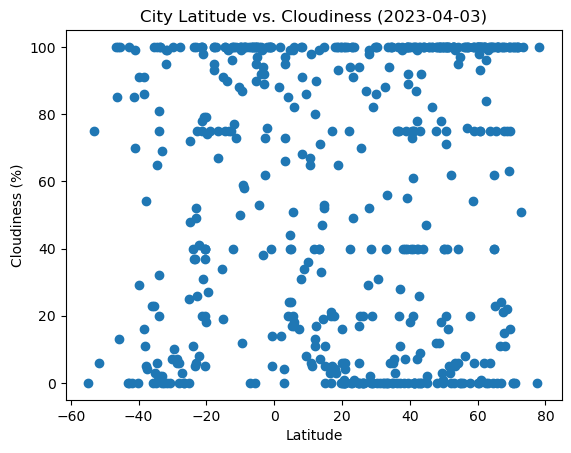

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({lcity_date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

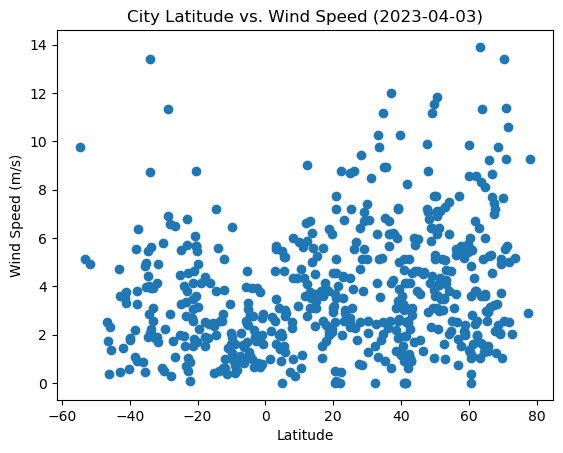

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed ({lcity_date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_reg_plt(xin, yin, x_title, y_title, h_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xin, yin)
    regress_values = xin * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = xin * slope + intercept
    plt.scatter(xin,yin)
    plt.plot(xin,regress_values,"r-")
#    
#    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(h_title)
#   print(xey, yey)
# Show plot
#    plt.annotate(line_eq,(20,14),fontsize=15,color="red")
    plt.text(0, 20, line_eq, fontsize=12, color='red')
    print(f"The r  correlation between Latitude and the {y_title} is: {rvalue}")
    plt.show()   
   


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0].reset_index(drop=True).copy()
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sidi ali,36.0998,0.4206,12.28,50,0,2.26,DZ,2023-04-03
1,narsaq,60.9167,-46.0500,7.12,73,100,2.80,GL,2023-04-03
2,jamestown,42.0970,-79.2353,4.77,57,40,2.57,US,2023-04-03
3,chokurdakh,70.6333,147.9167,-15.28,87,100,5.53,RU,2023-04-03
4,stephenville,32.2207,-98.2023,19.76,97,0,1.54,US,2023-04-03


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0].reset_index(drop=True).copy()
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,26.85,81,49,6.79,PF,2023-04-03
1,constitucion,-35.3333,-72.4167,13.71,62,23,3.95,CL,2023-04-03
2,cidreira,-30.1811,-50.2056,20.18,76,7,5.80,BR,2023-04-03
3,santa maria,-29.6842,-53.8069,12.71,89,10,2.24,BR,2023-04-03
4,hermanus,-34.4187,19.2345,18.22,84,1,4.00,ZA,2023-04-03


###  Temperature vs. Latitude Linear Regression Plot

The r  correlation between Latitude and the Max Temp is: -0.8908317381721068


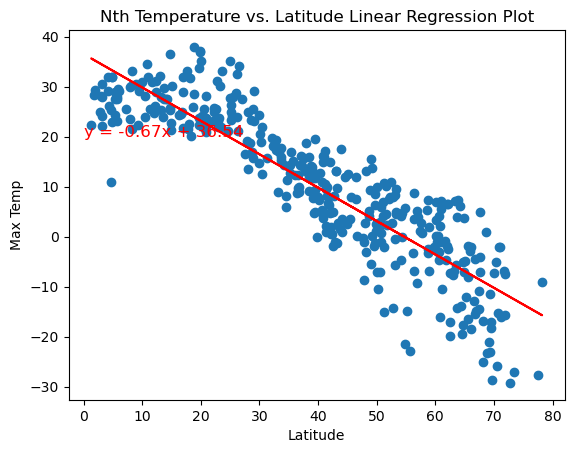

In [15]:
# Linear regression on Northern Hemisphere
#northern_hemi_df = northern_hemi_df.dropna(subset=['Lat', 'Max Temp']).reset_index(drop=True)
north_x_values = northern_hemi_df['Lat']
north_y_values = northern_hemi_df['Max Temp']
linear_reg_plt(north_x_values, north_y_values,'Latitude','Max Temp','Nth Temperature vs. Latitude Linear Regression Plot')



#north_x_values = northern_hemi_df['Lat']
#north_y_values = northern_hemi_df['Max Temp']
#linear_reg_plt(north_x_values, north_y_values,'Latitude','Max Temp','Nth Temperature vs. Latitude Linear Regression Plot')

The r  correlation between Latitude and the Max Temp is: 0.6336597703661885


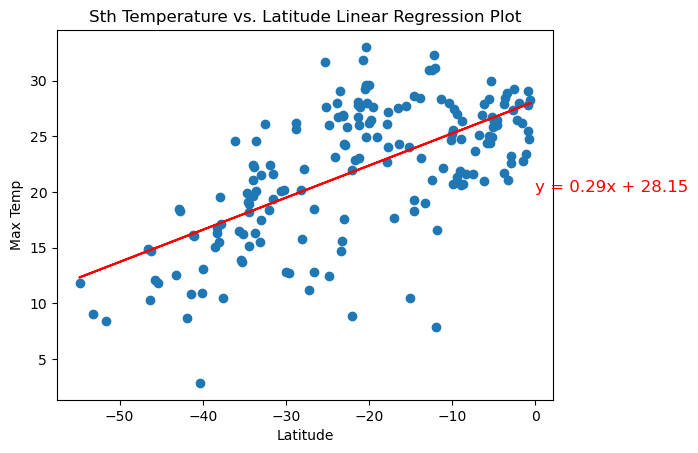

In [16]:
# Linear regression on Southern Hemisphere
south_x_values = southern_hemi_df['Lat']
south_y_values = southern_hemi_df['Max Temp']
linear_reg_plt(south_x_values, south_y_values,'Latitude','Max Temp','Sth Temperature vs. Latitude Linear Regression Plot')

**Discussion about the linear relationship:** We see high r values here, being correlation, -.89 for Northern Hem, and 0.65 for Southern Hem. Given that the latitude is zero at the equator, we expect that as we move from the equator northwards the temp will decrease (-ve gradient on our graph val and -ve r), and for the opposite as we move from the Southern Hemisphere extremity to the equator the temp will increase (+ve gradient on our graph and +r val). The r values reflect that, and strongly.

### Humidity vs. Latitude Linear Regression Plot

The r  correlation between Latitude and the Humidity is: 0.33965071253580575


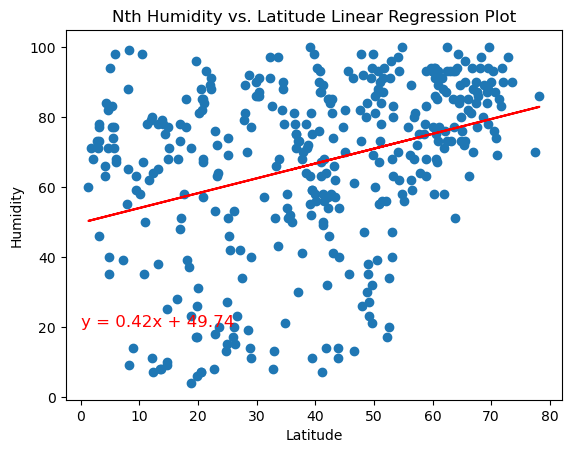

In [17]:
# Northern Hemisphere
north_x_values = northern_hemi_df['Lat']
north_y_values = northern_hemi_df['Humidity']
linear_reg_plt(north_x_values, north_y_values,'Latitude','Humidity','Nth Humidity vs. Latitude Linear Regression Plot')

The r  correlation between Latitude and the Humidity is: 0.320679992041255


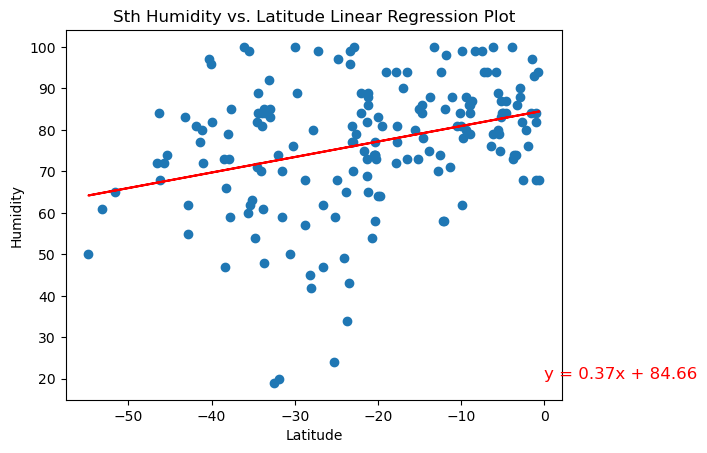

In [18]:
# Southern Hemisphere
south_x_values = southern_hemi_df['Lat']
south_y_values = southern_hemi_df['Humidity']
linear_reg_plt(south_x_values, south_y_values,'Latitude','Humidity','Sth Humidity vs. Latitude Linear Regression Plot')

**Discussion about the linear relationship:** I am surprised by these graphs. I just assumed that Humidity was higher by the equator, but our Northern Hemisphere graph shows a positive gradient as we mobve from the equator. The southern hemisphere has a gradient showing increasing humidity towards the equator.  Our r values are low and if we look at the r squared we would say that perhaps one in 13 of our temerature differences from a site on the equator could be explained by Humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r  correlation between Latitude and the Cloudiness is: 0.21379418388580118


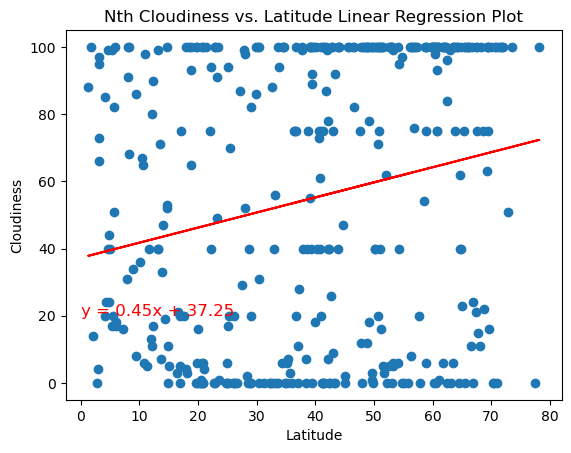

In [19]:
# Northern Hemisphere
north_x_values = northern_hemi_df['Lat']
north_y_values = northern_hemi_df['Cloudiness']
linear_reg_plt(north_x_values, north_y_values,'Latitude','Cloudiness','Nth Cloudiness vs. Latitude Linear Regression Plot')

The r  correlation between Latitude and the Cloudiness is: 0.38863146701849066


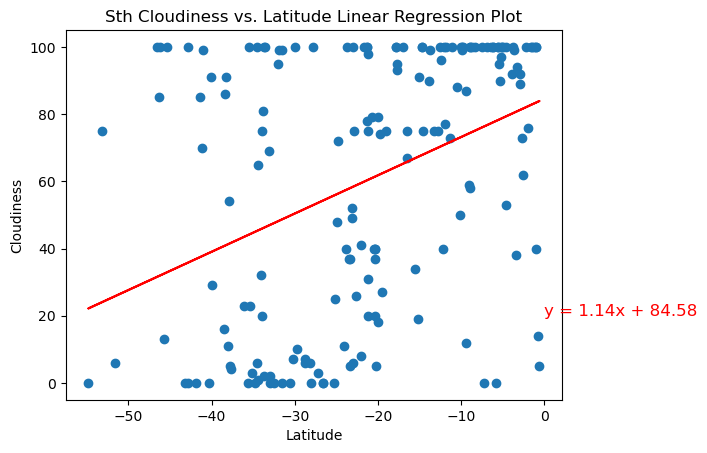

In [20]:
# Southern Hemisphere
south_x_values = southern_hemi_df['Lat']
south_y_values = southern_hemi_df['Cloudiness']
linear_reg_plt(south_x_values, south_y_values,'Latitude','Cloudiness','Sth Cloudiness vs. Latitude Linear Regression Plot')

**Discussion about the linear relationship:** I cannot explain the difference in r values against Latitude for Northern Hemisphere against Southern. The Southern Hemisphere has a r value of .449  against .205 for the North.  The Southern Hemisphere has less land and in Australia rain bands are often not shared within the continent. Cities are closer to permanent water and rain fed reservoirs - although there are so few cities in Australia that data is skewed against Australia.
Further , clouds get flung higher in the sky at the equator, and hang lower towards the poles. To expect uniform behaviour across a hemisphere is a big ask. Cloud cover outpaces the effect of humidity in the Southern Hemisphere. The gradients for the Northern and Southern Hemisphere show that cloud cover is least at the Southern Extremes and climbs continuallyu across the equator into the far north.

### Wind Speed vs. Latitude Linear Regression Plot

The r  correlation between Latitude and the Wind Speed is: 0.17870173347683227


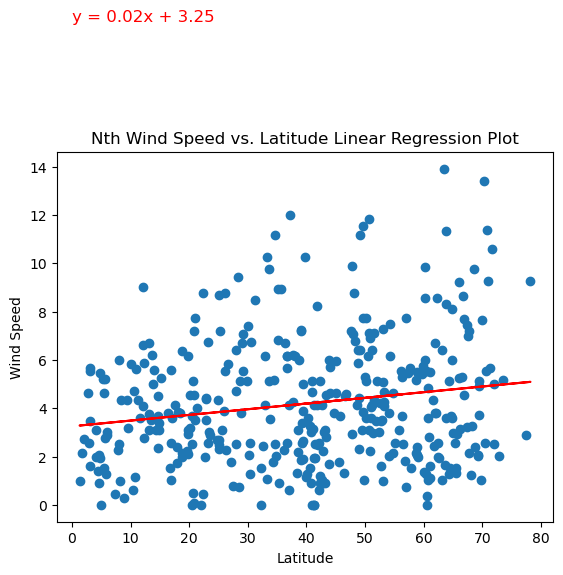

In [21]:
# Northern Hemisphere
north_x_values = northern_hemi_df['Lat']
north_y_values = northern_hemi_df['Wind Speed']
linear_reg_plt(north_x_values, north_y_values,'Latitude','Wind Speed','Nth Wind Speed vs. Latitude Linear Regression Plot')

The r  correlation between Latitude and the Wind Speed is: -0.2667261426238996


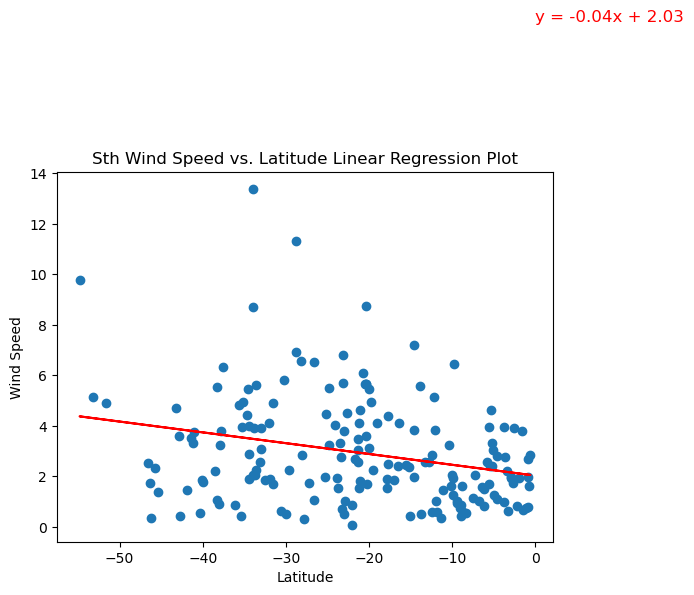

In [22]:
# Southern Hemisphere
south_x_values = southern_hemi_df['Lat']
south_y_values = southern_hemi_df['Wind Speed']
linear_reg_plt(south_x_values, south_y_values,'Latitude','Wind Speed','Sth Wind Speed vs. Latitude Linear Regression Plot')

**Discussion about the linear relationship:Wind speed picks up mildly as you move from the equator. The correspondence is weak. 
Our graphs show nearly a flat gradient.
But again we are trying to assess a correspondence across a hemisphere. 
Continental features have huge effects that negate these trends.
We have all heard of 'The Roaring Forties', 
the fierce Westerly winds in the Southern Hemisphere from -40 to -50 degrees. 
These are unpleasant climates and not much populated so do not skew our data.
Trade winds are found across 30 degrees North and South of the equator, 
with the exception of the first 5 degrees either side of the equator called the
Inter-Tropical Convergence Zone. Trade due to the turning of the Earth causing Air 
in the Northern Hemisphere to blow across the equator to the  South Westerly 
In the Southern Hemisphere the air will slant  across the equator to the North West.
The narrow Inter-Tropical Convergence zones has ocean current and
wind pressure responsible for the build up of heat as hot dry air that vaults into the sky 
to form persistant tropical clouds and rain bands in the tropics and cool towards 
the horse latitudes 30 degrees either side of the equator to bring trade winds
and rain as they sink.
https://oceanservice.noaa.gov/facts/tradewinds.html
We are asking a lot to make rules of thumb about wind speed and Latitiude.
